### Question 05

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")

import warnings
warnings.simplefilter("ignore")

crs = ccrs.PlateCarree()

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

Reproducing Figure 2.b

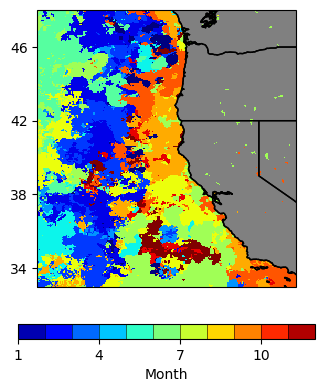

In [3]:
# Select the time scale from 2002 to 2016 and group by day of year. 

ds_1=ds.analysed_sst.sel(time=slice("2002","2016-07"))
sst_1=ds_1.groupby(ds_1.time.dt.dayofyear)

# Select the time scale from 2002 to 2012 and group by day of year. 
ds_2=ds.analysed_sst.sel(time=slice("2002","2012"))
sst_2=ds_2.groupby(ds_2.time.dt.dayofyear)
# Calculate the mean
sst_2_mean = np.mean(sst_2)

# use sst_1 minus sst_2_mean to calculate the anomolies
anomalies=sst_1-sst_2_mean

# find the maximum anomoly
max_anomaly=anomalies.idxmax(dim='time').dt.month

# plot the figure
ax = plt.subplot(projection=crs)
max_anoma_month=max_anomaly.plot(ax=ax, transform=crs, add_colorbar=False, cmap='jet')
cbar = plt.colorbar(max_anoma_month, location='bottom', shrink=0.6, pad=0.1, drawedges=True, boundaries=np.arange(1, 13))
cbar.set_label('Month')
cbar.set_ticks([1,4,7,10])

ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

ax.set_xticks(range(138, 122, 8))
ax.set_yticks(range(34, 47, 4))
ax.set_xlabel("")
ax.set_ylabel("")

plt.savefig('outputs/Question05.png');
plt.show()